# Candidatos a vereadores, doações e doadores

A partir dos dados da prestação de contas das eleições feitas ao Tribunal Superior
Eleitoral (TSE) analisamos os dados das doações recebidas por candidatos a prefeitura
de Feira de Santana.

Vale salientar que os dados são atualizados pelo TSE diariamente. Atenção a data
que essa análise foi publicada e a data de _download_ do arquivo.

### Instruções download dos dados

A análise foi feita com arquivos do [repositório de dados eleitorais do TSE](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais).

Faça o download do arquivo: http://agencia.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_de_contas_eleitorais_candidatos_2020.zip (download feito em 31/10/2020)

Siga o seguinte caminho dentro da pasta:
```
Prestação de contas eleitorais > 2020 > Candidatos (formato zip) > receitas_candidatos_2020_BA.csv
```

Copie o arquivo do estado desejado (`receitas_candidatos_2020_<estado>.csv`)
para a pasta `analysis` nesse repositório.

Dicionário de dados: `leiame_receitas-candidatos.pdf`

Observações sobre os dados:

* `#NULO` é o mesmo que `None`
* `#NE` significa que naquele ano a informação não era registrada
* Campo `UF`: `BR` para nível nacional, `VT` voto em trânsito e `ZZ` para Exterior
* Campo `NM_UE`, no caso de eleições municipais, é o nome do município

Vamos carregar os dados:

In [20]:
import pandas as pd
from scripts.parsers import currency_to_float, is_company


df = pd.read_csv("receitas_candidatos_2020_BA.csv", encoding="latin", delimiter=";")
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
0,30/10/2020,22:14:31,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Parcial,...,Prefeito,13,PT,Partido dos Trabalhadores,137771339756BA000001E,#NULO#,13902130,08/10/2020,SANTINHOS,"120,00"
1,30/10/2020,22:14:31,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Relatório Financeiro,...,#NULO#,11,PP,PROGRESSISTAS,#NULO#,557006000005920,14033825,21/10/2020,#NULO#,"40000,00"
2,30/10/2020,22:14:31,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Relatório Financeiro,...,#NULO#,40,PSB,Partido Socialista Brasileiro,#NULO#,551800000039540,14033826,23/10/2020,#NULO#,"5000,00"
3,30/10/2020,22:14:31,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Parcial,...,Prefeito,55,PSD,Partido Social Democrático,000551139799BA000001E,00001,13760214,13/10/2020,#NULO#,"5250,00"
4,30/10/2020,22:14:31,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Parcial,...,#NULO#,-1,#NULO#,#NULO#,558881339799BA000002E,09848428534,13789080,13/10/2020,#NULO#,"125,00"


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

## Vamos filtrar e limpar os dados

In [22]:
df_feira = df[df["NM_UE"] == "FEIRA DE SANTANA"].copy()

In [23]:
df_feira["VR_RECEITA"] = df_feira["VR_RECEITA"].apply(currency_to_float)

In [24]:
fields = [
    "NM_CANDIDATO", "SG_PARTIDO", "NM_PARTIDO", "DS_FONTE_RECEITA",
    "DS_ORIGEM_RECEITA",
    "DS_CNAE_DOADOR", "NR_CPF_CNPJ_DOADOR", "NM_DOADOR", "NM_DOADOR_RFB",
    "SG_UF_DOADOR", "CD_MUNICIPIO_DOADOR",
    "NM_MUNICIPIO_DOADOR", "NM_PARTIDO_DOADOR", "DT_RECEITA", "DS_RECEITA", "VR_RECEITA",
    "DS_CARGO",
]

df_filtered = df_feira[fields]

In [25]:
citycouncil_df = df_filtered[df_filtered["DS_CARGO"] == "Vereador"]
citycouncil_df.sample(5)  # doações a candidatos a vereadores de Feira de Santana

,NM_CANDIDATO,SG_PARTIDO,NM_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,NM_PARTIDO_DOADOR,DT_RECEITA,DS_RECEITA,VR_RECEITA,DS_CARGO
37366,JHONATAS LIMA MONTEIRO,PSOL,Partido Socialismo e Liberdade,Outros Recursos,Recursos de Financiamento Coletivo,"Tratamento de dados, provedores de serviços de...",8746641000100,APPCIVICO CONSULTORIA LTDA,APPCIVICO CONSULTORIA LTDA,#NULO#,-1,#NULO#,#NULO#,13/10/2020,#NULO#,3070.0,Vereador
37072,ANTÔNIO CORREIA LUZ,SOLIDARIEDADE,Solidariedade,Outros Recursos,Recursos de pessoas físicas,#NULO#,12489190504,RAIMUNDO SANTOS LUZ,RAIMUNDO SANTOS LUZ,#NULO#,-1,#NULO#,#NULO#,15/10/2020,#NULO#,1500.0,Vereador
37297,RONALDO ALMEIDA CARIBÉ,MDB,Movimento Democrático Brasileiro,Outros Recursos,Recursos de pessoas físicas,#NULO#,1012178544,GLEBSON GONÇALVES DOS SANTOS,GLEBSON GONCALVES DOS SANTOS,#NULO#,-1,#NULO#,#NULO#,21/10/2020,#NULO#,2800.0,Vereador
37017,JOSE FERREIRA SALES,PT,Partido dos Trabalhadores,Outros Recursos,Recursos próprios,#NULO#,28356594553,JOSE FERREIRA SALES,JOSE FERREIRA SALES,BA,35157,FEIRA DE SANTANA,Partido dos Trabalhadores,08/10/2020,#NULO#,1000.0,Vereador
37154,PAULO FERNANDO DA SILVA DOS ANJOS,PATRIOTA,Patriota,Outros Recursos,Recursos de pessoas físicas,#NULO#,56523580504,MARCO PRISCO CALDAS MACHADO,MARCO PRISCO CALDAS MACHADO,#NULO#,-1,#NULO#,#NULO#,22/10/2020,#NULO#,1377.0,Vereador


Primeiro, vamos ver quantos vereadores receberam doações.

In [26]:
len(pd.unique(citycouncil_df["NM_CANDIDATO"]))

264

## Ranking de valores recebidos por candidatos

In [32]:
citycouncil_df.groupby(
    ["NM_CANDIDATO"]
)["VR_RECEITA"].agg(["sum"]).sort_values(ascending=False, by=["sum", "NM_CANDIDATO"])[:25]

,sum
NM_CANDIDATO,
IVAMBERG DOS SANTOS LIMA,36951.96
ALBERTO MATOS NERY,33350.00
EREMITA MOTA DE ARAÚJO,25000.00
JOSÉ CARNEIRO ROCHA,24500.00
MARCOS ANTONIO DOS SANTOS LIMA,23500.00
PEDRO AMÉRICO DE SANTANA SILVA LOPES,22610.00
FERNANDO DANTAS TORRES,16600.00
JUAN PABLO MARTINS DANTAS DA CRUZ,16195.24
HUDOSN DOUGLAS SIMOES DE FREITAS,16170.00


## Soma, valores mais comuns e número de doadores

In [28]:
citycouncil_df.groupby(["NM_CANDIDATO"])["VR_RECEITA"].agg(["sum", "median", "count"])

,sum,median,count
NM_CANDIDATO,,,
ABILIO DAS MERCES BARROSO NETO,6500.00,3250.00,2
ACHILLES SANTA BARBARA BARBOSA,1800.00,900.00,2
ADRIANA MASCARENHAS MATTOS BULOS,2937.00,1468.50,2
ADRIANO RAIMUNDO CERQUEIRA COSTA,3016.01,500.00,5
ADROALDO OLIVEIRA DOS SANTOS,1000.00,500.00,2
...,...,...,...
WALLISSON DOS SANTOS LIMA,330.00,330.00,1
WASHINGTON DA SILVA ANDRADE,1500.00,1500.00,1
WELINGTHON GONÇALVES VITÓRIO,2050.00,1025.00,2


## Quem são os doadores?

In [29]:
citycouncil_df.groupby(
    ["NM_CANDIDATO", "NM_DOADOR_RFB", "NM_PARTIDO_DOADOR"]
)["VR_RECEITA"].agg(["sum"])

sum
NM_CANDIDATO                     NM_DOADOR_RFB                                    NM_PARTIDO_DOADOR              
ABILIO DAS MERCES BARROSO NETO   ABILIO DAS MERCES BARROSO NETO                   Partido Social Cristão  5000.00
                                 DIRETORIO NACIONAL DO PARTIDO SOCIAL CRISTAO     Partido Social Cristão  1500.00
ACHILLES SANTA BARBARA BARBOSA   ACHILLES SANTA BARBARA BARBOSA                   Solidariedade           1800.00
ADRIANA MASCARENHAS MATTOS BULOS ADRIANA MASCARENHAS MATTOS BULOS                 Partido Verde           2937.00
ADRIANO RAIMUNDO CERQUEIRA COSTA ALAIDE CARNEIRO DE OLIVEIRA                      #NULO#                   500.00
...                                                                                                           ...
WELINGTHON GONÇALVES VITÓRIO     WELINGTHON GONCALVES VITORIO                     Solidariedade           2050.00
WENDERSON DA PAIXÃO CHAGAS       JOSIANE PEREIRA DOS SANTOS                       #NULO#                   100.00
                                 LEONICE DA PAIXAO SANTOS                         #NULO#                   120.00
                                 PSL - PARTIDO SOCIAL LIBERAL COMISSAO PROVISORIA Partido Social Liberal  5000.00
WILKER BOAVENTURA CARNEIRO       PARTIDO NOVO                                     Partido Novo            1685.24

[477 rows x 1 columns]

## Quantos estão doando para si mesmo?

In [30]:
# checa se existem homônimos
print(len(pd.unique(citycouncil_df["NM_DOADOR_RFB"])), len(pd.unique(citycouncil_df["NR_CPF_CNPJ_DOADOR"])))

# número de candidatos
print(len(pd.unique(citycouncil_df["NM_CANDIDATO"])))

# quantas doações foram pra si mesmo?
citycouncil_df["NM_DOADOR_RFB"].eq(citycouncil_df["NM_CANDIDATO"]).value_counts()

364 364
264


False    430
True     176
dtype: int64

### Qual a origem dos recursos?

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

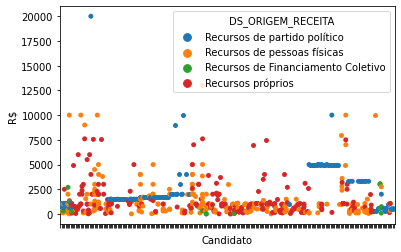

In [36]:
ax = sns.stripplot(
    x="NM_CANDIDATO", y="VR_RECEITA", hue="DS_ORIGEM_RECEITA", data=citycouncil_df
)
ax.set_xlabel("Candidato")
ax.set_ylabel("R$")
ax.set_xticklabels([], rotation=90)

## Ranking de Doadores

In [34]:
citycouncil_df.groupby(["NM_DOADOR_RFB", "NM_DOADOR"])["VR_RECEITA"].agg(
    ["sum"]
).sort_values(ascending=False, by=["sum", "NM_DOADOR_RFB"])

,,sum
NM_DOADOR_RFB,NM_DOADOR,
PSL - PARTIDO SOCIAL LIBERAL COMISSAO PROVISORIA,Direção Estadual/Distrital,90000.00
PARTIDO LIBERAL (PL),Direção Nacional,46000.00
DIRETORIO NACIONAL DO PARTIDO SOCIAL CRISTAO,Direção Nacional,34500.00
PARTIDO COMUNISTA DO BRASIL,Direção Nacional,33400.00
PARTIDO SOCIALISTA BRASILEIRO-FEIRA DE SANTANA-BA-MUNICIPAL,Direção Municipal/Comissão Provisória,33000.00
PARTIDO SOCIAL LIBERAL,Direção Nacional,30000.00
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,Direção Nacional,20000.00
PARTIDO NOVO,Direção Nacional,16852.40
ADELMARIO EVANGELISTA XAVIER,ADELMARIO E. XAVIER,13000.00


## Um mesmo doador doou pra mais de um candidato?

In [35]:
citycouncil_df[["NM_DOADOR_RFB", "NM_CANDIDATO"]].value_counts()

NM_DOADOR_RFB                                                 NM_CANDIDATO                            
GILMAR AMORIM DE OLIVEIRA                                     GILMAR AMORIM DE OLIVEIRA                   6
NOURIVAL FERREIRA SANTOS                                      NOURIVAL FERREIRA SANTOS                    5
TELISSON DOS ANJOS DE SOUZA                                   TELISSON DOS ANJOS DE SOUZA                 5
JOSE DA COSTA CORREIA FILHO                                   JOSÉ DA COSTA CORREIA FILHO                 5
JOSSE PAULO PEREIRA BARBOSA                                   JOSSE PAULO PEREIRA BARBOSA                 4
HAMILTON FIGUEIREDO TELES                                     HAMILTON FIGUEIREDO TELES                   4
MARINEY PORTUGAL DOS SANTOS PIMENTEL                          MARINEY PORTUGAL DOS SANTOS PIMENTEL        4
RENATO FRANCISCO MEIRA AMORIM                                 RENATO FRANCISCO MEIRA AMORIM               4
JOSE NEPOMUCENO DA SILVA NETO    

## Veja todas as doações

In [31]:
pd.set_option('display.max_rows', None)
citycouncil_df

,NM_CANDIDATO,SG_PARTIDO,NM_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,NM_PARTIDO_DOADOR,DT_RECEITA,DS_RECEITA,VR_RECEITA,DS_CARGO
36744,JUSSARA TEREZINHA WOLKER MORAES OLIVEIRA,NOVO,Partido Novo,Outros Recursos,Recursos de partido político,Atividades de organizações políticas,13405866000124,Direção Nacional,PARTIDO NOVO,BR,-1,#NULO#,Partido Novo,26/09/2020,SERVIÇOS JURIDICOS,1070.06,Vereador
36745,JUSSARA TEREZINHA WOLKER MORAES OLIVEIRA,NOVO,Partido Novo,Outros Recursos,Recursos de partido político,Atividades de organizações políticas,13405866000124,Direção Nacional,PARTIDO NOVO,BR,-1,#NULO#,Partido Novo,26/09/2020,SERVIÇOS CONTABEIS,615.18,Vereador
36746,ARLINDO JOSÉ DE CARVALHO NETO,NOVO,Partido Novo,Outros Recursos,Recursos de partido político,Atividades de organizações políticas,13405866000124,Direção Nacional,PARTIDO NOVO,BR,-1,#NULO#,Partido Novo,21/09/2020,SERVICOS JURIDICOS,1070.06,Vereador
36747,ARLINDO JOSÉ DE CARVALHO NETO,NOVO,Partido Novo,Outros Recursos,Recursos de partido político,Atividades de organizações políticas,13405866000124,Direção Nacional,PARTIDO NOVO,BR,-1,#NULO#,Partido Novo,21/09/2020,SERVICOS CONTABEIS,615.18,Vereador
36748,ARLINDO JOSÉ DE CARVALHO NETO,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,2904118586,RAPHAEL L MIRANDA,RAPHAEL LESSA MIRANDA,#NULO#,-1,#NULO#,#NULO#,06/10/2020,#NULO#,300.00,Vereador
36749,ANTÔNIO JORGE LEITE SANTOS,NOVO,Partido Novo,Outros Recursos,Recursos de partido político,Atividades de organizações políticas,13405866000124,Direção Nacional,PARTIDO NOVO,BR,-1,#NULO#,Partido Novo,22/09/2020,SERVIÇOS CONTABEIS,615.18,Vereador
36750,ANTÔNIO JORGE LEITE SANTOS,NOVO,Partido Novo,Outros Recursos,Recursos de partido político,Atividades de organizações políticas,13405866000124,Direção Nacional,PARTIDO NOVO,BR,-1,#NULO#,Partido Novo,22/09/2020,SERVIÇOS ADVOCATICIOS,1070.06,Vereador
36751,ANTÔNIO JORGE LEITE SANTOS,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,269256563,JOÃO V. B. VALE,JOAO VICTOR BRITO DO VALE,#NULO#,-1,#NULO#,#NULO#,26/10/2020,#NULO#,250.00,Vereador
36752,ANTÔNIO JORGE LEITE SANTOS,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,28141199587,GILMAR P. ANDRADE,GILMAR PEREIRA DE ANDRADE,#NULO#,-1,#NULO#,#NULO#,27/10/2020,#NULO#,100.00,Vereador
36753,ANTÔNIO JORGE LEITE SANTOS,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,8947770507,JHONATAS S. CRUZ,JHONATAS DOS SANTOS CRUZ,#NULO#,-1,#NULO#,#NULO#,06/10/2020,#NULO#,1000.00,Vereador
